# Total Amount Analysis
---
Erklärbär bla bla

In [2]:
cd ..

/Users/simonwolf/git/aaa21


In [3]:
import numpy as np
import utils,geo_engineering,eda,feature_engineering
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec
from PIL import Image as pilim
import seaborn as sns
from scipy.stats import zscore

#Global visualization setting
plt.rcParams['figure.dpi'] = 400
sns.color_palette("dark")
sns.set_style("ticks")
mpl.rcParams['font.size'] = 9.0

%matplotlib inline

In [4]:
chicago_df = utils.read_parquet('Taxi_Trips_Cleaned.parquet', 
                                columns=['Trip ID','Taxi ID','Trip Start Timestamp',
                                        'Trip End Timestamp','Pickup Community Area',
                                         'Dropoff Community Area','Trip Start Hour','Trip End Hour', 
                                         'Trip Total', 'Fare', 'Tips', 'Tolls', 'Extras'])
chicago_df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Pickup Community Area,Dropoff Community Area,Trip Start Hour,Trip End Hour,Trip Total,Fare,Tips,Tolls,Extras
0,70bf5261bff10278c0a99bf9b6dfd77b59da3f7b,d227267f2ecc06b906db9813671d5c14b2ca025df56515...,2015-01-01 00:00:00,2015-01-01 00:00:00,1.0,1.0,0,0,5.65,5.65,0.0,0.0,0.0
1,8a01052178bc15bd780297e93aaf328dc631ef3c,aafe2cb9e0f06a82f8b995a8292190fed97bc4b41f04d3...,2015-01-01 00:30:00,2015-01-01 00:30:00,8.0,8.0,0,0,8.84,4.84,3.0,0.0,1.0
2,097e67b0a173656e34f6ea4e8077c802ed55ab9f,4f3bc023d606842442d6275624a11dcf86dc1cbf201c5e...,2015-01-01 00:45:00,2015-01-01 00:45:00,8.0,8.0,0,0,6.05,5.05,0.0,0.0,1.0
3,35c0c4859532bafa924ee1e50d3b4aae575a63fd,4f3bc023d606842442d6275624a11dcf86dc1cbf201c5e...,2015-01-01 00:45:00,2015-01-01 01:00:00,8.0,6.0,0,1,12.05,11.05,0.0,0.0,1.0
4,95f482f9494be7695fe051572d7928090f46fcb2,8b12673d17dc4423a80ecc1f53d090cff311496e1694d7...,2015-01-01 00:45:00,2015-01-01 01:00:00,22.0,21.0,0,1,11.45,7.45,4.0,0.0,0.0


## Total Amount Distribution & Analysis (Univariate)
---

In [4]:
chicago_df['Trip Total'].describe()

count    2.197118e+07
mean     1.307813e+01
std      1.007677e+01
min      0.000000e+00
25%      7.150000e+00
50%      9.450000e+00
75%      1.405000e+01
max      9.825000e+01
Name: Trip Total, dtype: float64

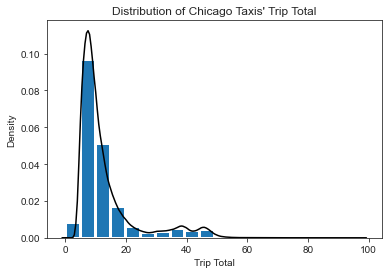

In [5]:
#Live version -> Run only if you have enough memory
_ = sns.distplot(chicago_df['Trip Total'],bins=20,hist=True,kde=True,
             kde_kws={"color": "k", "label": "KDE","alpha": 0.1},
            hist_kws={"linewidth": 3,"alpha": 1})
plt.title("Distribution of Chicago Taxis' Trip Total")
plt.ticklabel_format(style='plain')
_.figure.savefig('img/Trip_Total_Hist.png',bbox_inches='tight')
plt.show()

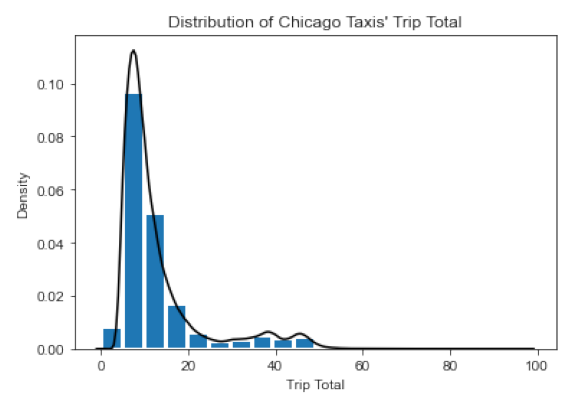

In [6]:
#Offline Version
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
Trip_Total_Hist = pilim.open('img/Trip_Total_Hist.png', 'r')
ax.imshow(np.asarray(Trip_Total_Hist))
ax.set_axis_off()
plt.show()

In [9]:
chicago_df[["Trip Total", "Fare", "Tips", "Tolls", "Extras"]].sum()

Trip Total    2.873419e+08
Fare          2.474669e+08
Tips          2.590695e+07
Tolls         1.245243e+04
Extras        1.395470e+07
dtype: float64

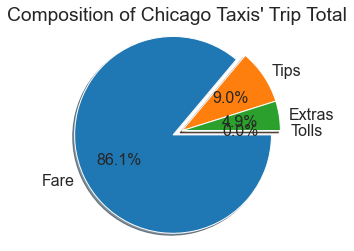

In [37]:
fig1, ax1 = plt.subplots()
data=chicago_df[["Fare", "Tips", "Extras", "Tolls"]]
ax1.pie(data.sum(), autopct='%1.1f%%', labels=data.columns, counterclock=False, explode = [0.1,0,0,0], shadow=True)
ax1.axis('equal')  
plt.title("Composition of Chicago Taxis' Trip Total")
plt.savefig('img/Trip_Total_Pie.png',bbox_inches='tight')

plt.show()

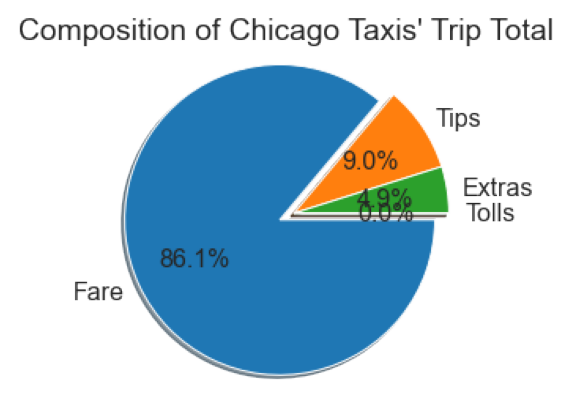

In [38]:
#Offline Version
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
Trip_Total_Pie = pilim.open('img/Trip_Total_Pie.png', 'r')
ax.imshow(np.asarray(Trip_Total_Pie))
ax.set_axis_off()
plt.show()

## Bivariate Analysis
---

### The relationship between total amount and weekday (Temporal Resolution: 24H)
---

### Total amount in the morning, midday, evening, and night (Temporal Resolution: 6H)
---

### The relationship between total amount and hour (Temporal Resolution: 1H)
---

# ----------------------------------

In [2]:
from utils import read_parquet

df = read_parquet(
        file="Taxi_Trips_Cleaned.parquet",
        columns=[
            "Trip ID",
            "Trip Start Hour",
            "Trip End Hour",
            "Pickup Census Tract",
            "Dropoff Census Tract",
            "Pickup Community Area",
            "Dropoff Community Area",
            "Trip Total",
        ],
    )

In [30]:
from feature_engineering import add_time_interval
add_time_interval(df=df)
df

,Trip ID,Trip Start Hour,Trip End Hour,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Trip Total,Pickup Time Interval,Dropoff Time Interval
0,70bf5261bff10278c0a99bf9b6dfd77b59da3f7b,0,0,None,None,1.0,1.0,5.65,night,night
1,8a01052178bc15bd780297e93aaf328dc631ef3c,0,0,17031081202.0,17031080100.0,8.0,8.0,8.84,night,night
2,097e67b0a173656e34f6ea4e8077c802ed55ab9f,0,0,17031081800.0,17031842200.0,8.0,8.0,6.05,night,night
3,35c0c4859532bafa924ee1e50d3b4aae575a63fd,0,1,17031842200.0,17031062500.0,8.0,6.0,12.05,night,night
4,95f482f9494be7695fe051572d7928090f46fcb2,0,1,17031832200.0,17031210602.0,22.0,21.0,11.45,night,night
...,...,...,...,...,...,...,...,...,...,...
21971171,fea22be3ae3918ee0c381acab9fada8d40695383,23,23,17031842300.0,17031833000.0,24.0,28.0,6.45,night,night
21971172,7b6484071d0b3a861cfa6e9a71adde527b2d6cf9,23,23,None,None,24.0,8.0,12.85,night,night
21971173,aaaa5956062cf174ec35c158339cdc7448d2fccc,23,23,17031240500.0,17031241400.0,24.0,24.0,5.75,night,night
21971174,11f5a5e7c691b514b5c93275f392e82a69fdccb9,23,23,None,None,6.0,22.0,11.05,night,night


In [33]:
df_sum = df.groupby(["Pickup Community Area", "Pickup Time Interval"])["Trip Total"].sum().reset_index(name="Trip Total Sum").sort_values(
    by=['Trip Total Sum'], ascending=False)
df_sum

,Pickup Community Area,Pickup Time Interval,Trip Total Sum
300,8.0,evening,2.798968e+07
301,8.0,midday,2.386564e+07
100,32.0,evening,2.115240e+07
101,32.0,midday,2.111763e+07
302,8.0,morning,1.635372e+07
...,...,...,...
199,54.0,night,2.488500e+02
191,52.0,night,2.471500e+02
196,54.0,evening,2.130500e+02
203,55.0,night,1.718900e+02


In [37]:
df_sum.plot.pie(
    figsize=(12,12), 
    legend=False, 
    startangle=90, 
    counterclock=False,
    subplots=True)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
df_sum["Trip Total Sum", ""].plot(kind = 'pie', y = 'Trip Total Sum', legend = False, ax = axes[0])
df2.plot(kind = 'pie', y = 'Trip Total Sum', labels = df2['country'], ax = axes[1])
axes[0].set_title('all countries')
axes[1].set_title('top 5')
plt.show()